In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import numpy as np

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

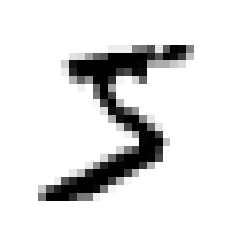

In [6]:
some_digit = X.iloc[0].values
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [5]:
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier()


In [ ]:

sgd_classifier.fit(X_train, y_train_5)

In [10]:
sgd_classifier.predict([some_digit])

C:\Users\aryak\miniconda3\envs\handson_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfold.split(X_train, y_train_5):
    clone_clf = clone(sgd_classifier)
    X_train_fold = X_train.iloc[train_index]
    y_train_fold = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9669
0.91625
0.96785


In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [14]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.91125, 0.90855, 0.90915])

In [8]:
from sklearn.model_selection import cross_val_predict


In [ ]:

y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

In [11]:
from sklearn.metrics import confusion_matrix


In [ ]:

confusion_matrix(y_train_5, y_train_pred)

In [17]:
perfect_predictions_on_y_train = y_train_5
confusion_matrix(y_train_5, perfect_predictions_on_y_train)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [19]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [20]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [21]:
y_scores = sgd_classifier.decision_function([some_digit])
y_scores

C:\Users\aryak\miniconda3\envs\handson_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [22]:
y_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3, method='decision_function')

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

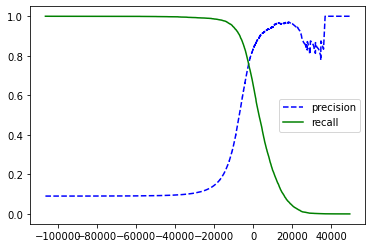

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.legend()
plt.show()

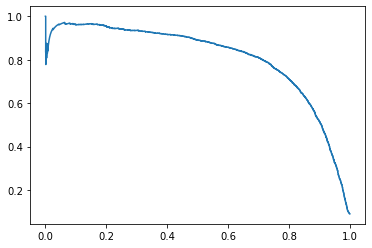

In [25]:
plt.plot(recalls, precisions)

In [26]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]
threshold_90_precision

3370.0194991439557

In [27]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [28]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [29]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds1 = roc_curve(y_train_5, y_scores)


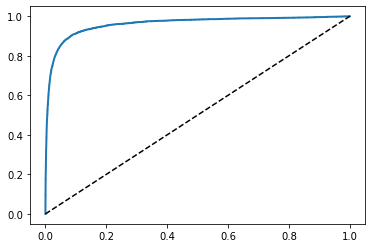

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008617

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [34]:
y_scores_forest = y_probas_forest[:, 1]

fpr_forest, tpr_forest, thresholds1_forest = roc_curve(y_train_5, y_scores_forest)

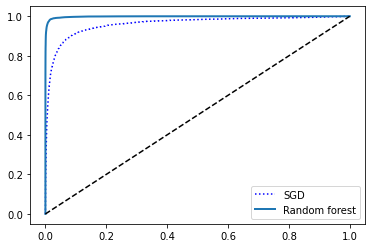

In [35]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random forest')
plt.legend(loc='lower right')
plt.show()

In [36]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983581438803564

In [58]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [59]:
svm_clf.predict([some_digit])

C:\Users\aryak\miniconda3\envs\handson_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [60]:
some_digit_scores = svm_clf.decision_function([some_digit])

C:\Users\aryak\miniconda3\envs\handson_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [61]:
some_digit_scores

array([[ 1.72502321,  2.72810019,  7.25098853,  8.30763599, -0.31087272,
         9.31324831,  1.70975311,  2.76765488,  6.2304951 ,  4.8477127 ]])

In [62]:
np.argmax(some_digit_scores)

5

In [63]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [45]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])


C:\Users\aryak\miniconda3\envs\handson_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\aryak\miniconda3\envs\handson_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\aryak\miniconda3\envs\handson_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\aryak\miniconda3\envs\handson_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\aryak\miniconda3\envs\handson_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\aryak\miniconda3\envs\handson_ml\lib\site-packages\sklearn\ba

array([5], dtype=uint8)

In [46]:
len(ovr_clf.estimators_)

10

In [64]:
sgd_clf1 = SGDClassifier()

In [65]:
sgd_clf1.fit(X_train, y_train)

SGDClassifier()

In [66]:
sgd_clf1.predict([some_digit])

C:\Users\aryak\miniconda3\envs\handson_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [70]:
sgd_clf1.decision_function([some_digit])

C:\Users\aryak\miniconda3\envs\handson_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-41536.1321606 , -28135.43677489, -10019.02769205,
          1282.27506825, -34314.54121096,    928.96761208,
        -16420.76730534, -16446.28947156,  -7383.25666063,
         -9779.98804272]])

In [54]:
cross_val_score(sgd_clf1, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [9]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train.astype(np.float64))


In [ ]:

cross_val_score(sgd_clf1, X_train_scaled, y_train, cv=3, scoring='accuracy')

In [10]:
y_train_pred1 = cross_val_predict(sgd_classifier, X_train, y_train, cv=3)

In [12]:
conf_mx = confusion_matrix(y_train, y_train_pred1)
conf_mx

array([[5613,    1,   39,   36,    5,   23,   66,    7,   98,   35],
       [   2, 5935,  122,   71,   10,   24,   21,   17,  501,   39],
       [  35,   50, 5226,  198,   66,   10,  114,   94,  138,   27],
       [  10,   11,  189, 5523,   17,   90,   27,   63,  114,   87],
       [  10,   14,   57,   27, 5277,   12,   67,   32,   62,  284],
       [  69,   15,   57,  644,  117, 3680,  166,   23,  498,  152],
       [  31,    8,   61,   20,   46,   69, 5549,    4,  120,   10],
       [  23,   18,   57,   59,   95,   14,    5, 5732,   24,  238],
       [  42,   74,  141,  477,   63,  159,   47,   36, 4468,  344],
       [  23,   12,   29,  135,  233,   24,    2,  300,   94, 5097]])